# ARIMA (자기회귀통합이동평균)
- (Autoregressive Integrated Moving Average)
- 시간을 독립변수로 사용
- 자기회귀와 이동평균 둘 다 고려
- 시계열의 비정상성을 설명하기 위해 관측시간의 차분을 사용

- 자기회귀(AR)항 (p)
- 이동평균(MA)항 (q)
- 차분(d) (현시점 - 전시점)

- ARIMA 모수 설정 : P + Q <2, P*Q = 0
    - AR모형의 Lag를 의미하는 p
    - 차분횟수를 의미하는 d
    - MA모형의 Lag를 의미하는 q

- 자기상관함수와 편자기상관함수를 사용해 AR과 MA의 파라미터 값 구함

- 평균이 일정하지 않은 경우 차분을 통해 평균을 정상화
- 분산이 일정하지 않은 경우 변환을 통해 분산을 정상화

In [25]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import yfinance as yf
from pandas_datareader import data as pdr

In [28]:
df_ss = pdr.get_data_yahoo('005930.KS','20200101','20201231')['Adj Close']


In [29]:
df_ss

Date
2020-01-02    52537.179688
2020-01-03    52822.707031
2020-01-06    52822.707031
2020-01-07    53108.238281
2020-01-08    54059.992188
                  ...     
2020-12-23    71766.921875
2020-12-24    75554.351562
2020-12-28    76428.375000
2020-12-29    77953.601562
2020-12-30    80641.656250
Name: Adj Close, Length: 248, dtype: float64

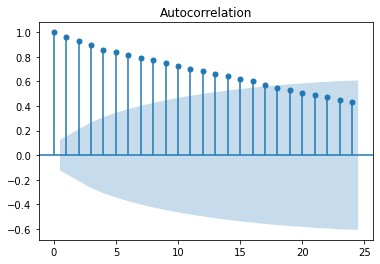

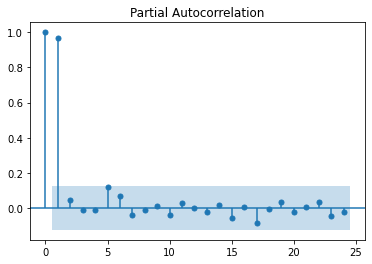

In [30]:
plot_acf(df_ss[1:])
plot_pacf(df_ss[1:])
plt.show()

- p=0 이면 IMA(d,q) -> d번 차분하면 MA(q)
- d=0 이면 ARMA(p,q) -> 정상성 만족
- q=0 이면 ARI(p,d) -> d번 차분하면 AR(p)
- 최적 차분 차수는 ACF, PACF를 통해 찾는다.

# 차분 1회 진행

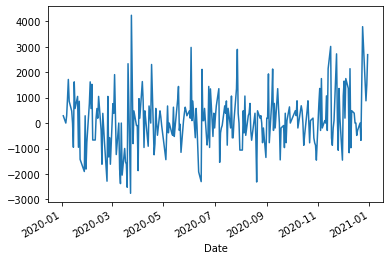

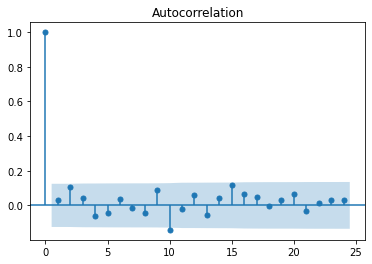

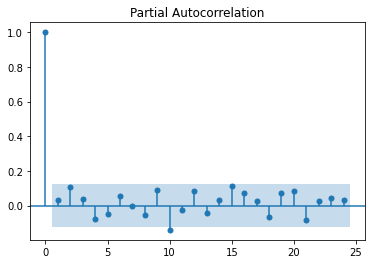

In [31]:
diff_1=df_ss.diff(periods=1).iloc[1:] # 하루
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# 모형 구축

ARIMA(0,1,1)

C:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

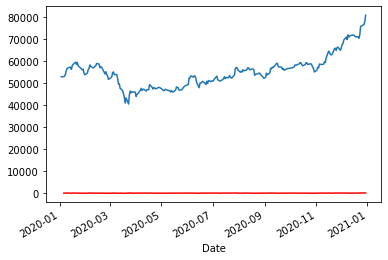

In [35]:
model = ARIMA(df_ss[1:], order=(0, 1, 1))
fitted_results = model.fit()
df_ss[1:].plot()
fitted_results.fittedvalues.plot(color='red')
plt.show()

In [42]:
model = ARIMA(df_ss, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  246
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2073.778
Method:                       css-mle   S.D. of innovations           1108.822
Date:                Tue, 18 May 2021   AIC                           4153.557
Time:                        15:58:38   BIC                           4164.073
Sample:                             1   HQIC                          4157.791
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               113.0852     72.661      1.556      0.120     -29.328     255.498
ma.L1.D.Adj Close     0.0279      0.058      0.477      0.634      -0.087       0.143
                        

In [44]:
model = ARIMA(df_ss, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  247
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2082.949
Method:                       css-mle   S.D. of innovations           1112.149
Date:                Tue, 18 May 2021   AIC                           4169.897
Time:                        15:59:01   BIC                           4176.916
Sample:                             1   HQIC                          4172.723
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ma.L1.D.Adj Close     0.0351      0.058      0.604      0.546      -0.079       0.149
                                    Roots                                    
                  Real          

C:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

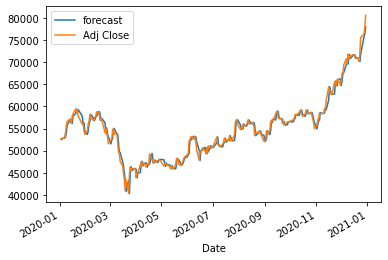

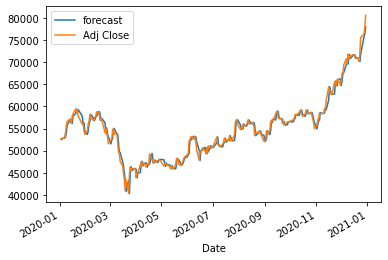

In [45]:
model_fit.plot_predict()

In [46]:
fore = model_fit.forecast(steps=1) #EPOCH같은거
print(fore)

(array([80734.1296632]), array([1112.1488724]), array([[78554.35792786, 82913.90139855]]))


In [57]:
df2 = pdr.get_data_yahoo('005930.KS','20210101','20210517')['Adj Close']
df2.head()


Date
2021-01-04    82632.804688
2021-01-05    83528.820312
2021-01-06    81836.343750
2021-01-07    82533.250000
2021-01-08    88407.148438
Name: Adj Close, dtype: float64